In [1]:
# data
import numpy as np
import matplotlib.pyplot as plt

# 正常点：以(0,0)为中心的高斯分布
normal_data = np.random.normal(0, 1, (100, 2))

# 异常点：随机远离原点分布
anomalies = np.random.uniform(low=5, high=8, size=(5, 2))

# 合并数据
X = np.vstack((normal_data, anomalies))


In [6]:
# 实现高斯分布密度函数 + p(x)
def gaussian(X, mu, sigma): # 👶传入所有点 X，平均值 mu，标准差 sigma。
    term1 = 1 / (2 * np.pi * sigma[0] * sigma[1])
    term2 = np.exp(-0.5 * (((X[:, 0] - mu[0])**2 / sigma[0]**2) + ((X[:, 1] - mu[1])**2 / sigma[1]**2)))
    return term1 * term2

# 估计参数
mu = np.mean(normal_data, axis=0) # mu 是正常样本的平均值 [μ₁, μ₂]
sigma = np.std(normal_data, axis=0) # sigma = np.std(normal_data, axis=0)

# 计算每个点的 p(x)
p = gaussian(X, mu, sigma)


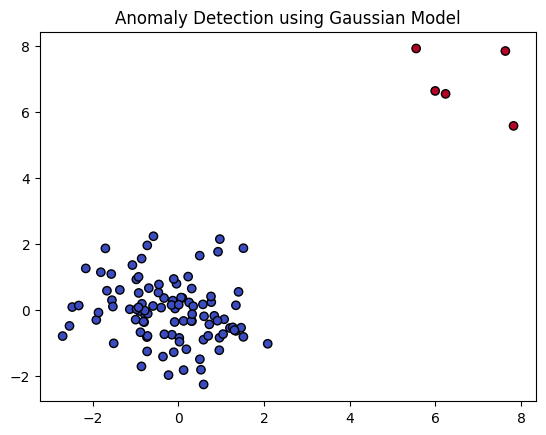

In [3]:
epsilon = 1e-4  # 阈值
is_anomaly = p < epsilon

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=is_anomaly, cmap="coolwarm", edgecolors='k')
plt.title("Anomaly Detection using Gaussian Model")
plt.show()
